# Курсовая работа по теме: "Заболевание печени"

### Цель исследования
Количество пациентов с заболеваниями печени постоянно увеличивается из-за чрезмерного употребления алкоголя, вдыхания вредных газов, употребления зараженной пищи, солений и наркотиков. Этот набор данных был использован для оценки алгоритмов прогнозирования с целью снижения нагрузки на врачей.

# Импортируем библиотеки

In [153]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, cross_validate
import warnings
warnings.filterwarnings('ignore')
sns.set()
plt.style.use('ggplot')
%matplotlib inline

# Загружаем датасет

In [10]:
df=pd.read_csv("indian_liver_patient.csv")

In [11]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Таргетовая перменная в данном датасете - это Dataset, которая рассказывает о том, есть ли у человека заболевание печени или нет.

Также данные содержат такие признаки, как:

-Возраст пациента

-Пол пациента

А также результаты анализов:

-Билирубин общий

-Прямой билирубин

-Щелочная фосфотаза

-Аламинаминотрансфераза

-Аспартатаминотрансфераза

-Всего Протьенов

-Альбумин

-Соотношение альбумина и глобулина


In [4]:
df.shape

(583, 11)

In [5]:
df.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Предобработка

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


Из данной информации можно увидеть, что в оснвном все данные имеют тип float или int, кроме признака гендер, который имеет тип object.

Посмотртим на распределение каждого признака:

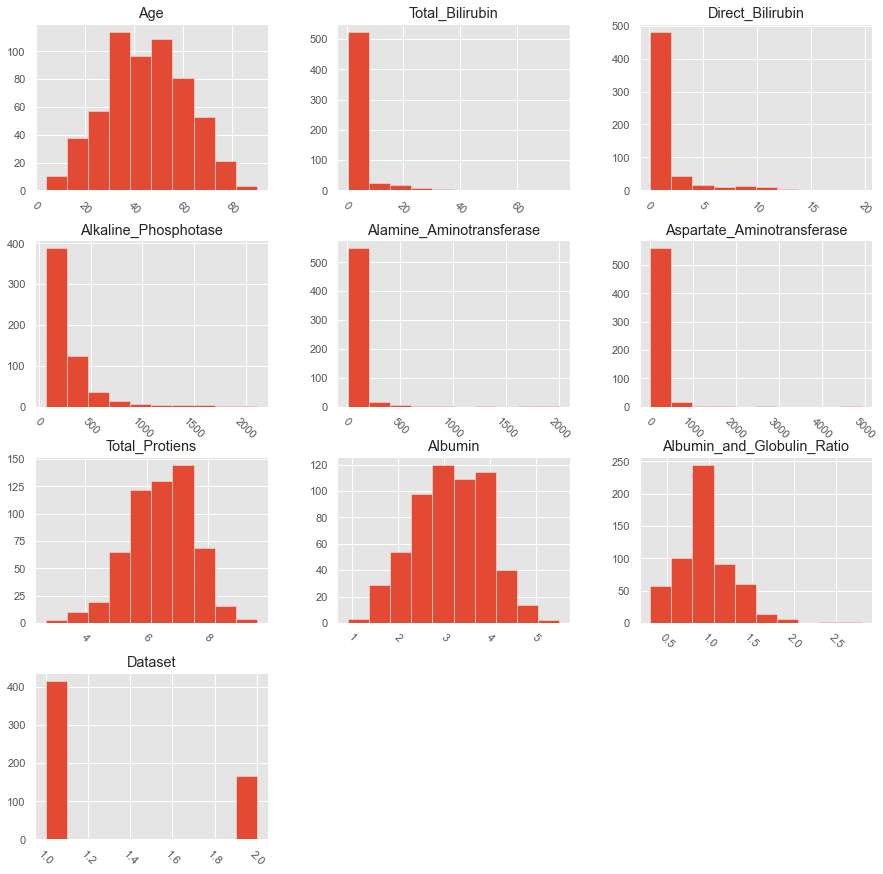

In [12]:
df.hist(figsize=(15,15), xrot=-45,bins=10)
plt.show()

In [14]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [15]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


Посмотрим, чтобы значения таргетовой перменной были только 1 или 0

In [16]:
df.Dataset.value_counts()

1    416
2    167
Name: Dataset, dtype: int64

Посмотрим на распределение категориального признака.

<AxesSubplot:xlabel='count', ylabel='Gender'>

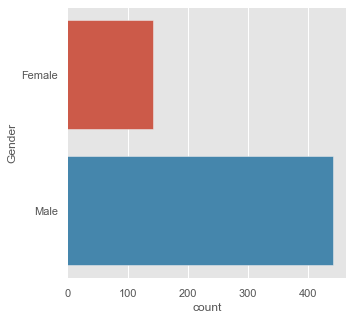

In [17]:
plt.figure(figsize=(5,5))
sns.countplot(y='Gender', data=df)

In [19]:
df['Gender'].value_counts()

Male      441
Female    142
Name: Gender, dtype: int64

С помощью LabelEncoder() преобразуем признак Gender в числовой

In [21]:
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])

In [22]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [23]:
df['Gender'].value_counts()

1    441
0    142
Name: Gender, dtype: int64

Можно увидеть, что теперь Gender содержит только значения 0 и 1.

Удалим дубликаты из датасета.

In [25]:
df = df.drop_duplicates()

In [26]:
df.shape

(570, 11)

Теперь можно заметить, что количество строк уменьшилось.

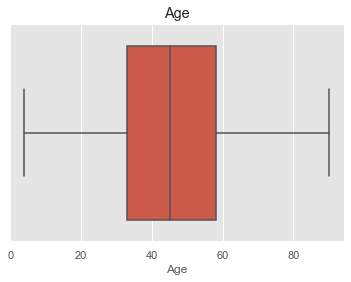

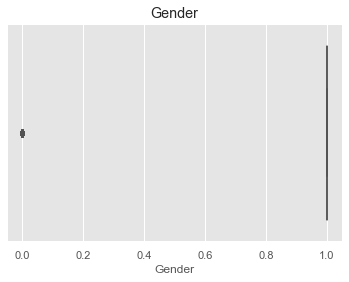

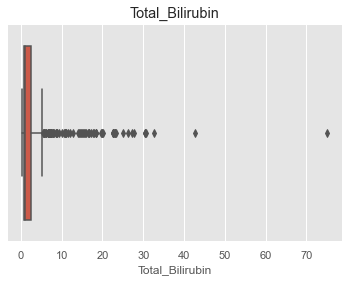

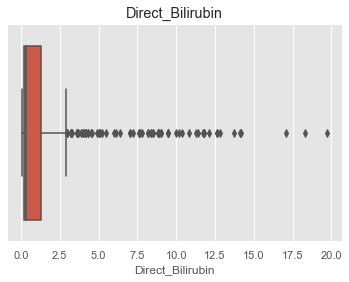

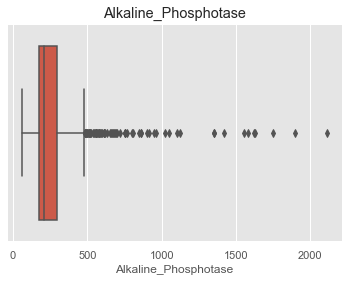

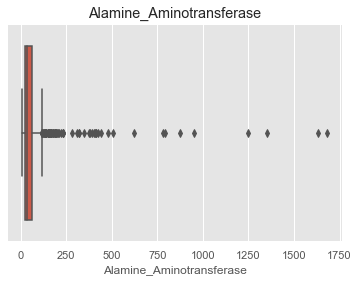

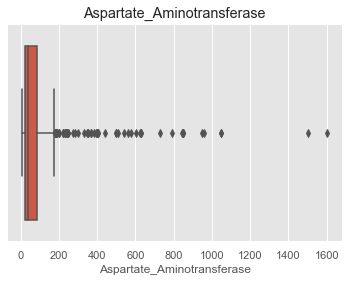

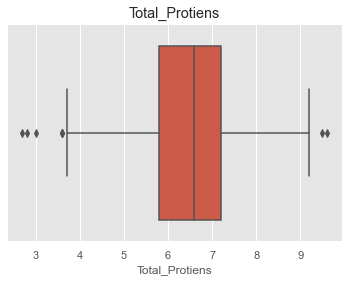

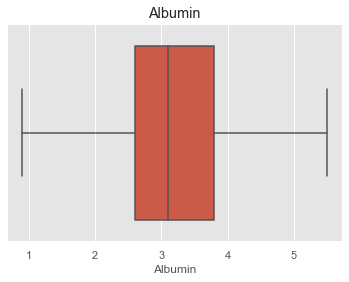

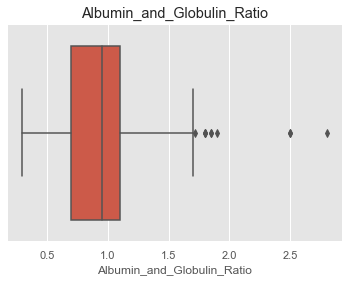

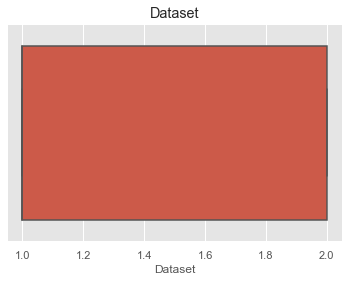

In [44]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

Исходя из графиков ящика с усами можно заметить большое количество аномальных значений, но мы рассмотрим признаки с самыми большими выбросами 

In [45]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

118    1600
207    1500
199    1050
119    1050
47      960
Name: Aspartate_Aminotransferase, dtype: int64

Можно заметить, что присутсвуют выбросы, ограничим максимальное значение до 3000

In [46]:
df = df[df.Aspartate_Aminotransferase<=3000]

In [47]:
df.shape

(568, 11)

In [48]:
df.Aspartate_Aminotransferase.sort_values(ascending=False).head()

118    1600
207    1500
199    1050
119    1050
47      960
Name: Aspartate_Aminotransferase, dtype: int64

Также можно увидеть, бльшой выброс значения, поэтому ограничим его.

In [49]:
df = df[df.Aspartate_Aminotransferase<=2500]

In [50]:
df.shape

(568, 11)

In [51]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

Можно увидеть, что в признаке Albumin_and_Globulin_Ratio есть 4 пропуска, так как этот признак имеет тип float64, то заполним пропуски средним значением.

In [52]:
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [51]:
df.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,1,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,0,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,0,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,0,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,0,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [53]:
df.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

Заметим, что теперь нулевые значения отсутсвуют.

# Построение модели

In [55]:
y=df.Dataset
X=df.drop('Dataset', axis=1)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [69]:
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size=0.2, random_state=0, stratify=y)

# Нормализация данных

In [70]:
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

Далее построим модели, используя в некоторых случаях GridSearch, для подбора наилучших параметров, а также найдем значения точностей моделей на тестовой и тренировочной выборке, а также для каждой модели получим значения на кросс-валидации.

In [154]:
kf = KFold(n_splits=5, shuffle=True, random_state=15)

# Logistic Regression

In [72]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [156]:
lr_acc_train = accuracy_score(y_train, lr.predict(X_train))
print(lr_acc_train)
lr_acc_test = accuracy_score(y_test, lr.predict(X_test))
print(lr_acc_test)
lr_cross = cross_val_score(lr, X,y, cv=kf, scoring='accuracy', n_jobs=-1).mean()
print(lr_cross)

0.724669603524229
0.7631578947368421
0.7077472442167366


# KNeighborsClassifier

In [137]:
knn=KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [158]:
knn_acc_train = accuracy_score(y_train, lr.predict(X_train))
print(knn_acc_train)
knn_acc_test = accuracy_score(y_test, knn.predict(X_test))
print(knn_acc)
knn_cross = cross_val_score(knn, X,y, cv=kf, scoring='accuracy', n_jobs=-1).mean()
print(knn_cross)

0.724669603524229
0.6754385964912281
0.663623660922217


# SVC

In [112]:
svc= SVC(probability=True)
parameters = {
    'gamma':[0.0001, 0.001, 0.01, 0.1],
    'C':[0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30]
}
grid_search = GridSearchCV(svc, parameters)
grid_search.fit(X_train, y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.01, 0.05, 0.5, 0.1, 1, 10, 15, 20, 30],
                         'gamma': [0.0001, 0.001, 0.01, 0.1]})

In [159]:
svc_acc_train = accuracy_score(y_train, grid_search.predict(X_train))
print(svc_acc_train)
svc_acc_test = accuracy_score(y_test, grid_search.predict(X_test))
print(svc_acc_test)
svc_cross = cross_val_score(grid_search, X,y, cv=kf, scoring='accuracy', n_jobs=-1).mean()
print(svc_cross)

0.711453744493392
0.7105263157894737
0.704145319049837


# DecisionTree

In [116]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [160]:
dtc_acc_train = accuracy_score(y_train, dtc.predict(X_train))
print(dtc_acc_train)
dtc_acc_test = accuracy_score(y_test, dtc.predict(X_test))
print(dtc_acc_test)
dtc_cross = cross_val_score(dtc, X,y, cv=kf, scoring='accuracy', n_jobs=-1).mean()
print(dtc_cross)

1.0
0.6140350877192983
0.6566526936811053


Сразу можно заметить, что модель переобучена, так как значение accuracy на train равно 1, а на test много меньше, поэтому воспользуемся подбором гиперпараметров

# Hyper Tunning

In [121]:
grid_parameter = {
    'criterion':['gini','entropy'],
    'max_depth':[3,5,7,10,12,15],
    'splitter':['best','random'],
    'min_samples_leaf':[1,2,3,5,7],
    'min_samples_split':[1,2,3,5,7],
    'max_features':['auto','sqrt','log2']
}
grid_seach_dt = GridSearchCV(dtc, grid_parameter, cv=24, n_jobs=-1, verbose=1)
grid_seach_dt.fit(X_train, y_train)

Fitting 24 folds for each of 1800 candidates, totalling 43200 fits


GridSearchCV(cv=24, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 12, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

In [122]:
grid_seach_dt.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [123]:
grid_seach_dt.best_score_

0.7290448343079922

In [161]:
data_acc_train = accuracy_score(y_train, grid_seach_dt.predict(X_train))
print(data_acc_train)
dtc_acc_test = accuracy_score(y_test, grid_seach_dt.predict(X_test))
print(dtc_acc_test)
dtc_gs_cross = cross_val_score(grid_seach_dt, X,y, cv=kf, scoring='accuracy', n_jobs=-1).mean()
print(dtc_gs_cross)

0.7224669603524229
0.7105263157894737
0.7006210215804999


# Random  Forest

In [162]:
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75, min_samples_leaf=7, min_samples_split=3, n_estimators = 130)

In [163]:
rand_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                       min_samples_leaf=7, min_samples_split=3,
                       n_estimators=130)

In [164]:
rand_clf_acc_train = accuracy_score(y_train, rand_clf.predict(X_train))
print((rand_clf_acc_train))
rand_clf_acc_test = accuracy_score(y_test, rand_clf.predict(X_test))
print(rand_clf_acc_test)
rand_clf_cross = cross_val_score(rand_clf, X,y, cv=kf, scoring='accuracy', n_jobs=-1).mean()
print(rand_clf_cross)

0.8964757709251101
0.7456140350877193
0.6936500543393882


# Gradient Boosting Classifier

In [169]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier()

parameters = {
    'loss': ['deviance', 'exponential'],
    'learning_rate': [0.001, 0.1, 1, 10],
    'n_estimators': [100, 150, 180, 200]
}

grid_search_gbc = GridSearchCV(gbc, parameters, cv = 20, n_jobs = -1, verbose = 1)
grid_search_gbc.fit(X_train, y_train)

Fitting 20 folds for each of 32 candidates, totalling 640 fits


GridSearchCV(cv=20, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.1, 1, 10],
                         'loss': ['deviance', 'exponential'],
                         'n_estimators': [100, 150, 180, 200]},
             verbose=1)

In [170]:
grid_search_gbc.best_params_

{'learning_rate': 0.1, 'loss': 'exponential', 'n_estimators': 100}

In [171]:
grid_search_gbc.best_score_

0.7116600790513834

In [172]:
gbc = GradientBoostingClassifier(learning_rate=0.001, loss='exponential',n_estimators=100)
gbc.fit(X_train , y_train)

GradientBoostingClassifier(learning_rate=0.001, loss='exponential')

In [174]:
gbc_acc_train = accuracy_score(y_train, gbc.predict(X_train))
print(gbc_acc_train)
gbc_acc_test = accuracy_score(y_test, gbc.predict(X_test))
print(gbc_acc_test)
gbc_gs_cross = cross_val_score(gbc, X,y, cv=kf, scoring='accuracy', n_jobs=-1).mean()
print(gbc_gs_cross)

0.711453744493392
0.7105263157894737
0.7112404906070486


# Model Comparison

In [176]:
models = pd.DataFrame({
    'Model':['Logistic Regreesion','KNN', 'SVC', 'Decision Tree Classifier', 'Random Forest Classifier', 'Gradient Boosting Classifer'],
    'Score':[100*round(lr_cross, 4), 100*round(knn_cross, 4), 100*round(svc_cross, 4), 100*round(dtc_cross, 4), 100*round(rand_clf_cross, 4), 100*round(gbc_gs_cross, 4)]
})

In [177]:
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Gradient Boosting Classifer,71.12
0,Logistic Regreesion,70.77
2,SVC,70.41
4,Random Forest Classifier,69.37
1,KNN,66.36
3,Decision Tree Classifier,65.67


[76.32, 71.05, 71.05, 67.54, 74.56, 71.05]
[72.47, 100.0, 71.15, 72.47, 89.64999999999999, 71.15]
[70.77, 65.67, 70.41, 66.36, 69.37, 71.12]


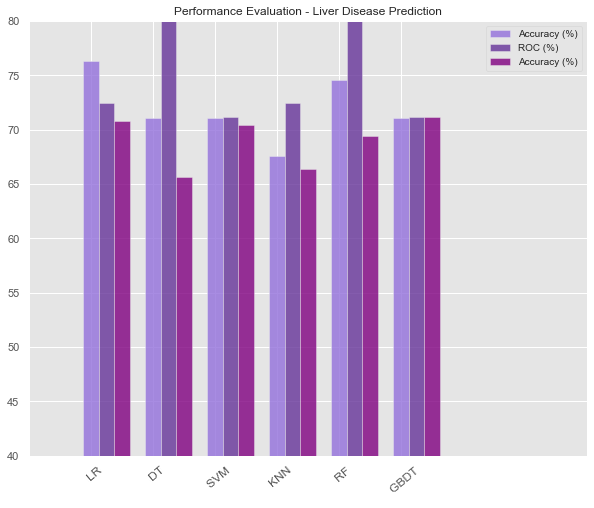

In [180]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
models = [
{
    'label': 'LR',
    'model': lr,
},
{
    'label': 'DT',
    'model': dtc,
},
{
    'label': 'SVM',
    'model': svc,
},
{
    'label': 'KNN',
    'model': knn,
},
{
    'label': 'RF',
    'model': rand_clf,
},
{
    'label': 'GBDT',
    'model': gbc,
}
]

means_roc = [100*round(lr_acc_train,4), 100*round(dtc_acc_train,4), 100*round(svc_acc_train,4), 100*round(knn_acc_train,4), 
                  100*round(rand_clf_acc_train,4), 100*round(gbc_acc_train,4)]
means_accuracy = [100*round(lr_acc_test,4), 100*round(dtc_acc_test,4), 100*round(svc_acc_test,4), 100*round(knn_acc_test,4), 
                  100*round(rand_clf_acc_test,4), 100*round(gbc_acc_test,4)]
means_cross = [100*round(lr_cross,4), 100*round(dtc_cross,4), 100*round(svc_cross,4), 100*round(knn_cross,4), 
                  100*round(rand_clf_cross,4), 100*round(gbc_gs_cross,4)]

print(means_accuracy)
print(means_roc)
print(means_cross)

# data to plot
n_groups = 6
means_accuracy = tuple(means_accuracy)
means_roc = tuple(means_roc)
meanc_cross = tuple(means_cross)

# create plot
fig, ax = plt.subplots(figsize=(10,8))
index = np.arange(n_groups)
bar_width = 0.25
opacity = 0.8

rects1 = plt.bar(index, means_accuracy, bar_width,
alpha=opacity,
color='mediumpurple',
label='Accuracy (%)')

rects2 = plt.bar(index + bar_width, means_roc, bar_width,
alpha=opacity,
color='rebeccapurple',
label='ROC (%)')

rects3 = plt.bar(index+2*bar_width, means_cross, bar_width,
alpha=opacity,
color='purple',
label='Accuracy (%)')

plt.xlim([-1, 8])
plt.ylim([40, 80])

plt.title('Performance Evaluation - Liver Disease Prediction', fontsize=12)
plt.xticks(index, ('   LR', '   DT', '   SVM', '   KNN',  '   RF', '   GBDT'), rotation=40, ha='center', fontsize=12)
plt.legend(loc="upper right", fontsize=10)
plt.savefig("PE_liver.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

Исходя из результатов и построенного графика можно сказать, что Gradient Boosting Classifier показал наилучшие результаты среди всех моделей не только просто сравнивая acuuracy, но также и на кросс-валидации, а также можно заметить, что все три точности расположены близко друг к другу, поэтому выбор среди всех моделей выпал именно на Gradient Boosting Classifier.